In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

In [2]:
names = pd.read_csv('kddcup_names.csv')

In [3]:
kdd = pd.read_csv('kddcup.data.corrected', header=0, names=names.Feature, index_col=None)

In [4]:
kdd.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'Label'],
      dtype='object')

In [5]:
kdd.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Label
0,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,238,1282,0,0,0,0,...,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,normal.


In [7]:
kdd.shape

(4898430, 42)

In [8]:
kdd = kdd[kdd['service']=='http']

In [9]:
kdd.shape

(623090, 42)

In [10]:
from sklearn.preprocessing import LabelEncoder

encs = dict()
data = kdd.copy()  #.sample(frac=1)
for c in data.columns:
    if data[c].dtype == "object":
        encs[c] = LabelEncoder()
        data[c] = encs[c].fit_transform(data[c])

In [11]:
from sklearn.ensemble import IsolationForest

In [14]:
X_train, y_train = data[kdd.columns][:300000], data["Label"][:300000].values
X_valid, y_valid = data[kdd.columns][300000:500000], data["Label"][300000:500000].values
X_test, y_test = data[kdd.columns][500000:], data["Label"][500000:].values

In [15]:
iForest = IsolationForest(n_estimators=1000, max_samples=256, contamination=0.2, random_state=2018)

In [16]:
iForest.fit(X_train)

IsolationForest(bootstrap=False, contamination=0.2, max_features=1.0,
        max_samples=256, n_estimators=1000, n_jobs=1, random_state=2018,
        verbose=0)

In [17]:
scores = iForest.decision_function(X_valid)

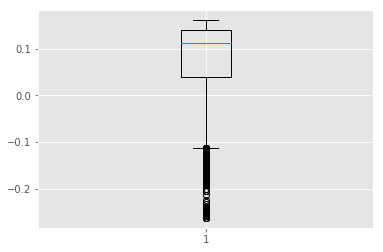

In [25]:
s1 = plt.boxplot(scores)

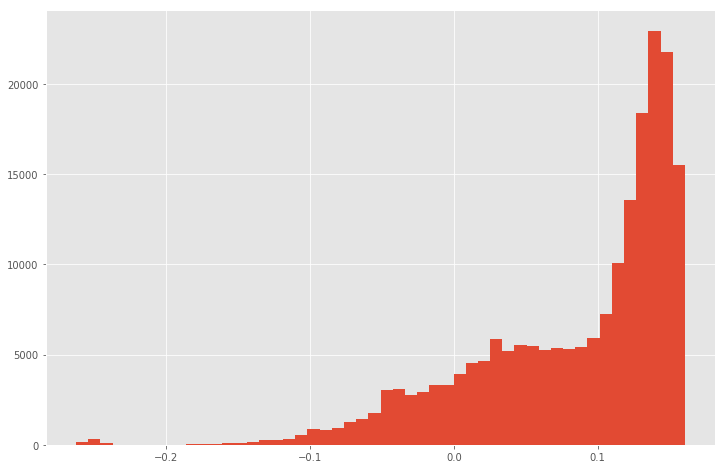

In [20]:
plt.figure(figsize=(12, 8))
plt.hist(scores, bins=50);

In [22]:
from sklearn.metrics import roc_auc_score
print("AUC: {:.1%}".format(roc_auc_score((-0.2 < scores), y_valid == list(encs["Label"].classes_).index("normal."))))

AUC: 98.7%


In [23]:
scores_test = iForest.decision_function(X_test)

In [24]:
print("AUC: {:.1%}".format(roc_auc_score((-0.2 < scores_test), y_test == list(encs["Label"].classes_).index("normal."))))

AUC: 99.4%
